In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql


In [2]:
credit=pd.read_csv(r"C:\Users\dlc\Downloads\train.csv",header=0)
credit_bk=credit.copy()
credit.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
credit.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [4]:
credit=credit.fillna(method="ffill")
credit

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,7,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
credit.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [6]:
credit.duplicated().any()

False

In [7]:
for i in credit.columns:
    print (credit[i].value_counts())

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
Jessicad              49
Langep                48
Stevex                48
Jonesb                41
Nate Raymondw         41
                      ..
Anurags                5
Daniel Basesg          5
Baertleinz             5
Samuel Shenf           5
Olesya Dmitracovaq     4
Name: Name, Length: 10139, dtype: int64
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663  

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

In [9]:
del credit['ID']
del credit['Customer_ID']

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Name                      100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   SSN                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  object 
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  ob

In [11]:
# use label encoder 
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
credit['Month']=LE.fit_transform(credit['Month'])
credit['Occupation']=LE.fit_transform(credit['Occupation'])
credit['Annual_Income']=LE.fit_transform(credit['Annual_Income'])
credit['Num_of_Loan']=LE.fit_transform(credit['Num_of_Loan'])
credit['Type_of_Loan']=LE.fit_transform(credit['Type_of_Loan'])
credit['Num_of_Delayed_Payment']=LE.fit_transform(credit['Num_of_Delayed_Payment'])
credit['Changed_Credit_Limit']=LE.fit_transform(credit['Changed_Credit_Limit'])
credit['Credit_Mix']=LE.fit_transform(credit['Credit_Mix'])
credit['Outstanding_Debt']=LE.fit_transform(credit['Outstanding_Debt'])
credit['Credit_History_Age']=LE.fit_transform(credit['Credit_History_Age'])
credit['Payment_of_Min_Amount']=LE.fit_transform(credit['Payment_of_Min_Amount'])
credit['Amount_invested_monthly']=LE.fit_transform(credit['Amount_invested_monthly'])
credit['Payment_Behaviour']=LE.fit_transform(credit['Payment_Behaviour'])
#credit['Monthly_Balance']=LE.fit_transform(credit['Monthly_Balance'])
credit['Credit_Score']=LE.fit_transform(credit['Credit_Score'])

In [12]:
credit.head()

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,Aaron Maashoh,23,821-00-0265,12,6011,1824.843333,3,4,3,244,128,3,685,1185,4.0,3,12062,26.822620,180,1,49.574949,81513,3,312.49408867943663,0
1,2,Aaron Maashoh,23,821-00-0265,12,6011,1824.843333,3,4,3,244,128,-1,685,1185,4.0,1,12062,31.944960,180,1,49.574949,7661,4,284.62916249607184,0
2,6,Aaron Maashoh,-500,821-00-0265,12,6011,1824.843333,3,4,3,244,128,3,685,4383,4.0,1,12062,28.609352,184,1,49.574949,82226,5,331.2098628537912,0
3,0,Aaron Maashoh,23,821-00-0265,12,6011,1824.843333,3,4,3,244,128,5,570,3906,4.0,1,12062,31.377862,185,1,49.574949,30358,6,223.45130972736786,0
4,7,Aaron Maashoh,23,821-00-0265,12,6011,1824.843333,3,4,3,244,128,6,570,1185,4.0,1,12062,24.797347,186,1,49.574949,55363,2,341.48923103222177,0


In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Name                      100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   SSN                       100000 non-null  object 
 4   Occupation                100000 non-null  int32  
 5   Annual_Income             100000 non-null  int32  
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int32  
 11  Type_of_Loan              100000 non-null  int32  
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  in

In [14]:
del credit['Name']
del credit['Age']
del credit['SSN']

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Occupation                100000 non-null  int32  
 2   Annual_Income             100000 non-null  int32  
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int32  
 8   Type_of_Loan              100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int32  
 11  Changed_Credit_Limit      100000 non-null  int32  
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

In [16]:
del credit['Monthly_Balance']

In [17]:
IndepVar=[]
for col in credit.columns:
    if col!='Credit_Score':
        IndepVar.append(col)
        
TargetVar='Credit_Score'

x=credit[IndepVar]
y=credit[TargetVar]

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 21), (30000, 21), (70000,), (30000,))

In [19]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [20]:
#Train the algorithm and build the model with trian dataset

from sklearn.linear_model import LinearRegression

#create an object for regression model

ModelLRGR=LinearRegression()

#Train the model with training dataset

ModelLRGR.fit(x_train,y_train)

#predict the model with test dataset

y_pred=ModelLRGR.predict(x_test)

#evaluation metrics for regression model
from sklearn import metrics
print('Mean Absolute Error(MAE):',round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error(MSE):',round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error(RMSE):',round(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)),3))
print('R2_score:',round(metrics.r2_score(y_test,y_pred),6))
print('Mean Absolute ppercentage Error(MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3), '%')
print('Root Mean Squared log Error(RMSLE):',round(np.log(np.sqrt(metrics.mean_absolute_error(y_test,y_pred))),3))

# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

r_squared=round(metrics.r2_score(y_test,y_pred),6)
adjusted_r_squared=round(1-(1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R square',adjusted_r_squared)

Mean Absolute Error(MAE): 0.658
Mean Squared Error(MSE): 0.545
Root Mean Squared Error(RMSE): 0.811
R2_score: 0.064365
Mean Absolute ppercentage Error(MAPE): 9.698538889027312e+16 %
Root Mean Squared log Error(RMSLE): -0.209
Mean Absolute Percentage Error (MAPE): inf %
Adj R square 0.064168


In [21]:
#Display the Final results



Results= pd.DataFrame({'CO2_Emissions_A':y_test,'CO2_Emissions_P':y_pred})



# Merge two Dataframes on index of both the dataframes





ResultsFinal =credit_bk.merge(Results, left_index=True, right_index=True)

# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['CO2_Emissions_A']-ResultsFinal['CO2_Emissions_P'])/ResultsFinal['CO2_Emissions_A'])*100,3)

# Display 10 records randomly



ResultsFinal.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,CO2_Emissions_A,CO2_Emissions_P,%Error
10600,0x541e,CUS_0x46f7,January,Masony,25,925-05-0709,Writer,19725.7,NaN,8,10,17,2,"Auto Loan, and Auto Loan",10,NaN,10.0,7.0,Standard,2234.82,26.617475,17 Years and 5 Months,Yes,19.398145,21.7979210099634,High_spent_Large_value_payments,382.3847674111672,Poor,1,1.437816,-43.782
15354,0x6ff8,CUS_0x8370,March,Nickm,35,348-82-8145,Journalist,20915.43,1533.952500,9,8,1322,2,"Auto Loan, and Debt Consolidation Loan",28,16,10.21,6.0,Bad,2186.19,32.278407,NaN,Yes,34.755719,85.40806829868707,Low_spent_Medium_value_payments,313.2314628025557,Poor,1,1.338913,-33.891
9311,0x4c8d,CUS_0x5a04,August,Catherine Bosleyt,21_,641-94-4207,Engineer,7775.33,849.944167,5,7,30,3,"Debt Consolidation Loan, Not Specified, and Au...",28,10,16.57,287.0,Standard,1766.86,34.965696,10 Years and 2 Months,Yes,17.497001,101.24187827689128,Low_spent_Small_value_payments,256.25553721963956,Poor,1,1.626149,-62.615
9023,0x4add,CUS_0xac0c,August,NaN,43,187-25-3679,Entrepreneur,63876.28,5325.023333,6,5,27,5,"Not Specified, Mortgage Loan, Debt Consolidati...",35,23,17.51,16.0,Bad,3886.33,34.792820,1 Years and 3 Months,Yes,160.204320,241.73299590885068,Low_spent_Large_value_payments,400.56501787790864,Poor,1,1.328428,-32.843
3533,0x2ab3,CUS_0xa45d,June,Shahv,38,441-54-5666,Doctor,20193.59,NaN,3,3,8,5,"Credit-Builder Loan, Mortgage Loan, Home Equit...",21,12,11.42,6.0,Standard,1109.22,41.335251,12 Years and 6 Months,Yes,68.090540,76.516704837286,Low_spent_Small_value_payments,285.4726721626119,Standard,2,1.571060,21.447


[[ 1480   316  1175]
 [   82  3603  2105]
 [ 3760  4886 12593]]
Print Class: 0
TP=1480, FN=1491, TN=23187, FP=3842
Accuracy: 0.822
Precision: 0.278
Sensitivity: 0.498
F1-Score: 0.357
Specificity: 0.858
Balanced Accuracy: 0.678
MCC: 0.278

Print Class: 1
TP=3603, FN=2187, TN=19008, FP=5202
Accuracy: 0.754
Precision: 0.409
Sensitivity: 0.622
F1-Score: 0.494
Specificity: 0.785
Balanced Accuracy: 0.704
MCC: 0.353

Print Class: 2
TP=12593, FN=8646, TN=5481, FP=3280
Accuracy: 0.602
Precision: 0.793
Sensitivity: 0.593
F1-Score: 0.679
Specificity: 0.626
Balanced Accuracy: 0.609
MCC: 0.199

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Speci

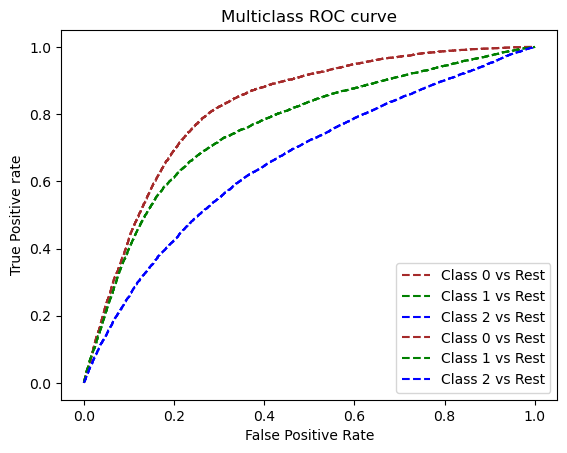

In [22]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

MHealthLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

MHealthLR = MHealthLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = MHealthLR.predict(x_test)
y_pred_prob = MHealthLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[ 3157   328  1897]
 [  344  5672  2666]
 [ 1821  2805 11310]]
Print Class: 0
TP=3157, FN=2225, TN=22453, FP=2165
Accuracy: 0.854
Precision: 0.593
Sensitivity: 0.587
F1-Score: 0.59
Specificity: 0.912
Balanced Accuracy: 0.75
MCC: 0.501

Print Class: 1
TP=5672, FN=3010, TN=18185, FP=3133
Accuracy: 0.795
Precision: 0.644
Sensitivity: 0.653
F1-Score: 0.649
Specificity: 0.853
Balanced Accuracy: 0.753
MCC: 0.504

Print Class: 2
TP=11310, FN=4626, TN=9501, FP=4563
Accuracy: 0.694
Precision: 0.713
Sensitivity: 0.71
F1-Score: 0.711
Specificity: 0.676
Balanced Accuracy: 0.693
MCC: 0.385

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specific

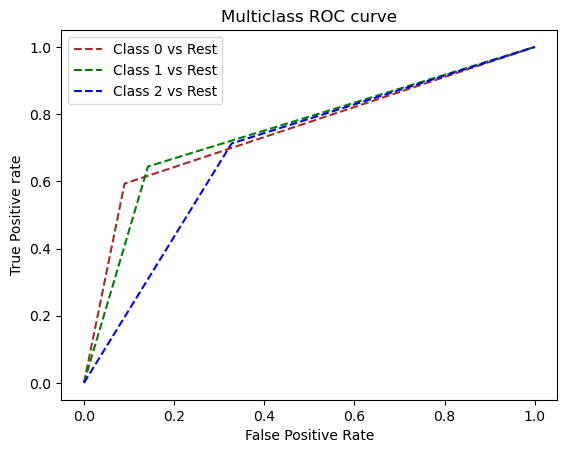

In [23]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.tree import DecisionTreeClassifier
ModelDT= DecisionTreeClassifier()
ModelDT.fit(x_train,y_train)
y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[ 3752   178  1196]
 [   50  6832  1926]
 [ 1520  1795 12751]]
Print Class: 0
TP=3752, FN=1374, TN=23304, FP=1570
Accuracy: 0.902
Precision: 0.705
Sensitivity: 0.732
F1-Score: 0.718
Specificity: 0.937
Balanced Accuracy: 0.834
MCC: 0.659

Print Class: 1
TP=6832, FN=1976, TN=19219, FP=1973
Accuracy: 0.868
Precision: 0.776
Sensitivity: 0.776
F1-Score: 0.776
Specificity: 0.907
Balanced Accuracy: 0.842
MCC: 0.683

Print Class: 2
TP=12751, FN=3315, TN=10812, FP=3122
Accuracy: 0.785
Precision: 0.803
Sensitivity: 0.794
F1-Score: 0.798
Specificity: 0.776
Balanced Accuracy: 0.785
MCC: 0.569

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Spec

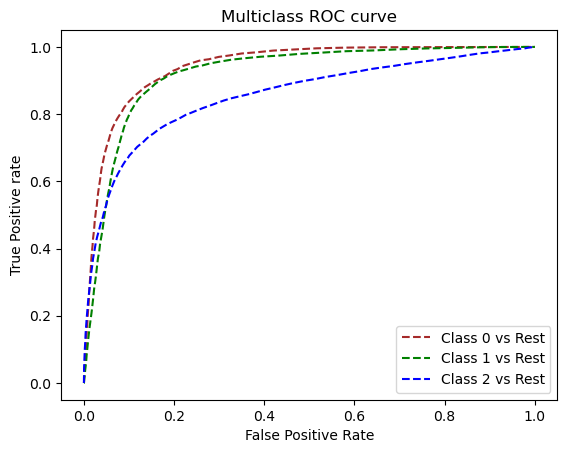

In [24]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
ModelRF= RandomForestClassifier()
ModelRF.fit(x_train,y_train)
y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[3054  899 3140]
 [ 131 4951 3093]
 [2137 2955 9640]]
Print Class: 0
TP=3054, FN=4039, TN=20639, FP=2268
Accuracy: 0.79
Precision: 0.574
Sensitivity: 0.431
F1-Score: 0.492
Specificity: 0.901
Balanced Accuracy: 0.666
MCC: 0.369

Print Class: 1
TP=4951, FN=3224, TN=17971, FP=3854
Accuracy: 0.764
Precision: 0.562
Sensitivity: 0.606
F1-Score: 0.583
Specificity: 0.823
Balanced Accuracy: 0.714
MCC: 0.42

Print Class: 2
TP=9640, FN=5092, TN=9035, FP=6233
Accuracy: 0.622
Precision: 0.607
Sensitivity: 0.654
F1-Score: 0.63
Specificity: 0.592
Balanced Accuracy: 0.623
MCC: 0.246

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
B

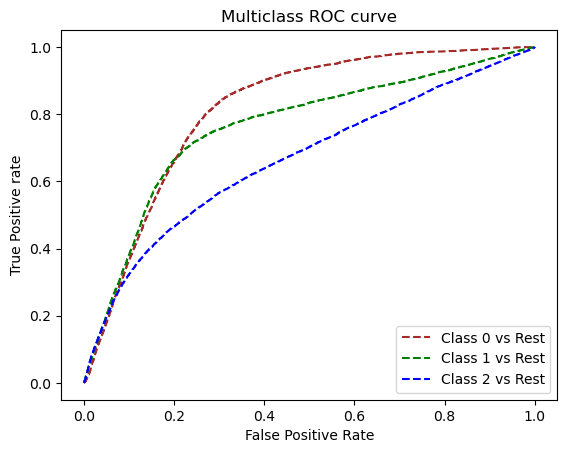

In [25]:

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

[[ 3597   286  1302]
 [   32  6377  1855]
 [ 1693  2142 12716]]
Print Class: 0
TP=3597, FN=1588, TN=23090, FP=1725
Accuracy: 0.89
Precision: 0.676
Sensitivity: 0.694
F1-Score: 0.685
Specificity: 0.93
Balanced Accuracy: 0.812
MCC: 0.618

Print Class: 1
TP=6377, FN=1887, TN=19308, FP=2428
Accuracy: 0.856
Precision: 0.724
Sensitivity: 0.772
F1-Score: 0.747
Specificity: 0.888
Balanced Accuracy: 0.83
MCC: 0.647

Print Class: 2
TP=12716, FN=3835, TN=10292, FP=3157
Accuracy: 0.767
Precision: 0.801
Sensitivity: 0.768
F1-Score: 0.784
Specificity: 0.765
Balanced Accuracy: 0.766
MCC: 0.532

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specifi

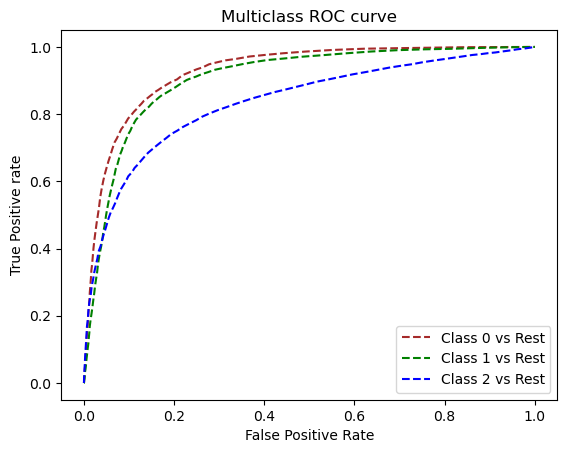

In [26]:

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for Extra Trees Classifier 

ModelET = ExtraTreesClassifier()

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class =3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
"""
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')"""

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
#load the result data set from KNN
KNN_Results= pd.read_csv(r"C:\Users\dlc\Downloads\KNN_Results.csv", header=0) 
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [28]:
EMResults = pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (1).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
[[ 1475   316  1170]
 [   82  3605  2107]
 [ 3765  4884 12596]]
Print Class: 0
TP=1475, FN=1486, TN=23192, FP=3847
Accuracy: 0.822
Precision: 0.277
Sensitivity: 0.498
F1-Score: 0.356
Specificity: 0.858
Balanced Accuracy: 0.678
MCC: 0.278

Print Class: 1
TP=3605, FN=2189, TN=19006, FP=5200
Accuracy: 0.754
Precision: 0.409
Sensitivity: 0.622
F1-Score: 0.494
Specificity: 0.785
Balanced Accuracy: 0.704
MCC: 0.353

Print Class: 2
TP=12596, FN=8649, TN=5478, FP=3277
Accuracy: 0.602
Precision: 0.794
Sensitivity: 0.593
F1-Score: 0.679
Specificity: 0.626
Balanced Accuracy: 0.609
MCC: 0.199

Print Class: 3
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 4
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Sensitivity: nan
F1-Score: nan
Specificity: 1.0
Balanced Accuracy: nan
MCC: nan

Print Class: 5
TP=0, FN=0, TN=30000, FP=0
Accuracy: 1.0
Precision: nan
Se

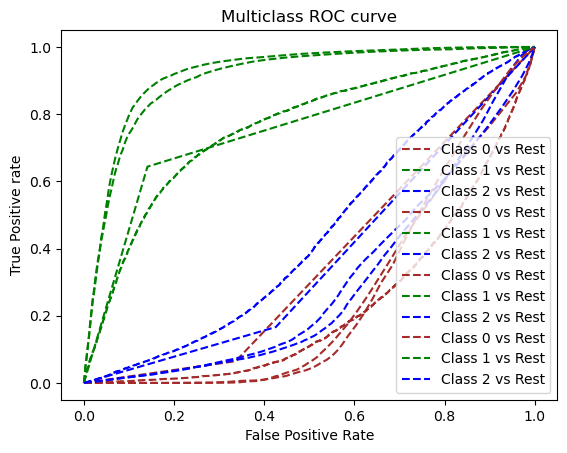

In [43]:
#==Step_02=============================================================================================================>

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
           
    # Train the model training dataset
   
    models.fit(x_train, y_train)
   
    # Prediction the model with test dataset
   
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
   
    # Print the model name
   
    print('Model Name: ', models)
   
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

   
    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0, 1, 2, 3, 4, 5, 6,7,8,9]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
   
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
   
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
   
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
   
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))


    # ROC curve for Multi classes
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)
   
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    """plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
    plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
    plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
    plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
    plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
    plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')"""

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------



In [46]:
EMResults.head(5)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,0,0,30000,1.0,NaN,NaN,NaN,1.0,NaN,0.745783,NaN
1,DecisionTreeClassifier(),0,0,0,30000,1.0,NaN,NaN,NaN,1.0,NaN,0.732504,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0,0,0,30000,1.0,NaN,NaN,NaN,1.0,NaN,0.903698,NaN
3,"(ExtraTreeClassifier(random_state=1228538955),...",0,0,0,30000,1.0,NaN,NaN,NaN,1.0,NaN,0.888905,NaN
4,LogisticRegression(),0,0,0,30000,1.0,NaN,NaN,NaN,1.0,NaN,0.745783,NaN


In [47]:
#predict the values with lR algorithm
y_predF = ModelRF.predict(x_test)

In [48]:
#create new dataframe with 'actual' vs 'predict' values
Results = pd.DataFrame({'stroke_A':y_test ,'stroke_P':y_predF})
# Merge two Dataframes on index of both the dataframes
ResultsFinal = credit_bk.merge(Results, left_index=True, right_index=True)
# Display the 10 records randomly
ResultsFinal.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,stroke_A,stroke_P
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,2,0
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,6.42,2.0,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good,0,0
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard,2,0
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,0,6,1.99,4.0,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard,2,2
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,5,5,-100,NaN,5,12,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard,2,2
